动量法

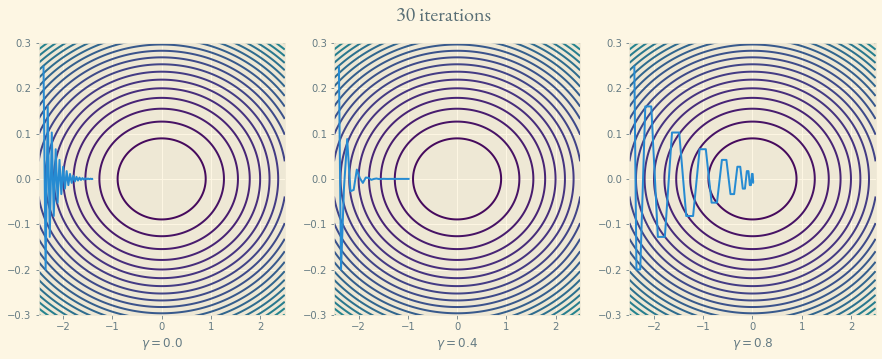

In [3]:
import matplotlib.pyplot as plt
import numpy as np

if __name__ == '__main__':

    iteration = 30
    a, b, lr = 0.1, 10, 0.09
    gamma_list = [0.0, 0.4, 0.8]
    T = len(gamma_list)

    N = 1000
    x_list = np.linspace(-2.5, 2.5, N)
    y_list = np.linspace(-0.5, 0.5, N)
    X, Y = np.meshgrid(x_list, y_list)
    Z = a * (X ** 2) + b * (Y ** 2)  # 目标函数

    with plt.style.context('Solarize_Light2'):

        fig, ax = plt.subplots(nrows=1, ncols=T, figsize=(15, 5))
        fig.suptitle('%d iterations' % iteration, color='#586e75', fontproperties={'family': 'EB Garamond', 'size': 20})
        for i in range(T):
            gamma = gamma_list[i]
            cp = ax[i].contour(X, Y, Z, 50)
            ax[i].set_xlim(-2.5, 2.5)
            ax[i].set_ylim(-.3, .3)
            ax[i].set_xlabel(r'$\gamma=$%s' % gamma)

            w_1, w_2, v_1, v_2 = -2.4, 0.25, 0, 0  # 初始值
            w_1_curve, w_2_curve, v_1_curve, v_2_curve = [], [], [], []
            w_1_curve.append(w_1)
            w_2_curve.append(w_2)
            v_1_curve.append(v_1)
            v_2_curve.append(v_2)

            for step in range(iteration):

                w_1 = w_1 - lr * 2 * a * w_1 + gamma * v_1_curve[step]
                w_1_curve.append(w_1)
                v_1_curve.append(w_1 - w_1_curve[step])

                w_2 = w_2 - lr * 2 * b * w_2 + gamma * v_2_curve[step]
                w_2_curve.append(w_2)
                v_2_curve.append(w_2 - w_2_curve[step])

            ax[i].plot(w_1_curve, w_2_curve)

        plt.savefig("momentum.svg", transparent=True)
        plt.show()
